# Credit Risk Analysis - 4

## Classification with Random Forest

### Training/Test Split

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [156]:
df_loan_default = pd.read_csv("credit_risk_dataset_feat.csv")
df_loan_default

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0.013514,0.005932,0.121951,0.014493,0.321348,0,0.10,0.000000,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.067568,0.005932,0.024390,0.144928,0.418539,1,0.57,0.035714,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0.040541,0.065148,0.097561,1.000000,0.551124,1,0.53,0.000000,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.054054,0.053390,0.195122,1.000000,0.497191,1,0.55,0.071429,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.013514,0.006250,0.048780,0.057971,0.096629,1,0.25,0.000000,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32561,0.500000,0.051907,0.024390,0.153623,0.434831,0,0.11,1.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
32562,0.459459,0.122881,0.097561,0.496377,0.116292,0,0.15,0.607143,1,0,...,0,1,0,0,0,0,0,0,1,0
32563,0.608108,0.076271,0.073171,1.000000,0.312921,1,0.46,0.928571,0,0,...,0,0,1,0,0,0,0,0,1,0
32564,0.486486,0.154661,0.121951,0.420290,0.340449,0,0.10,0.857143,1,0,...,0,0,1,0,0,0,0,0,1,0


In [157]:
x = df_loan_default.drop(['loan_status'], axis=1)
y = df_loan_default['loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=99)

In [158]:
print("Training Features Shape", x_train.shape)
print("Training Label Rows", y_train.count())

Training Features Shape (26052, 26)
Training Label Rows 26052


In [159]:
print("Testing Features Shape", x_test.shape)
print("Testing Label Rows", y_test.count())

Testing Features Shape (6514, 26)
Testing Label Rows 6514


In [160]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

loan_status
0    0.780132
1    0.219868
Name: proportion, dtype: float64
loan_status
0    0.788302
1    0.211698
Name: proportion, dtype: float64


In [161]:
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10)

## Model Evaluation

In [162]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [163]:
def eval_model(model, x_test, y_test):
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)

    conf_mat = confusion_matrix(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
    plt.show()

    #print(conf_mat)
    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)

    #Show ROC Curve 
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

    plot_roc_curve(fpr, tpr, roc_auc)

    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = list(preds)
    results_df['default_prob'] = probs[:, 1]

    #plot the distribution of probabilities for the estimated classes 
    sns.kdeplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", fill=True)
    sns.kdeplot(results_df[results_df['true_class'] == 1]['default_prob'], label="Default", fill=True)
    plt.title('Distribution of Probabilities for Estimated Classes')
    plt.legend(loc='best')
    plt.show()
    
    #see the true class versus predicted class as a percentage
    print(results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True))

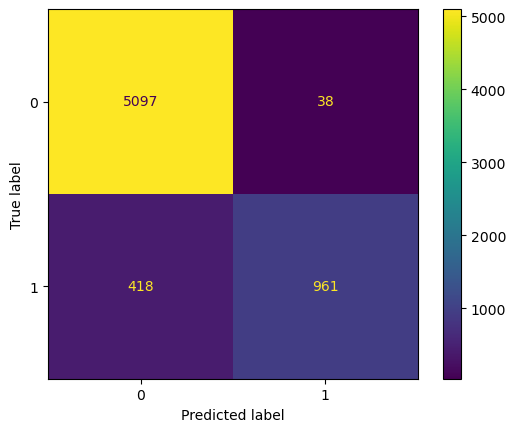



Accuracy:  0.9299969296898987
Precision:  0.9619619619619619
Recall:  0.696881798404641
F1:  0.808242220353238
AUC:  0.9221465676904861


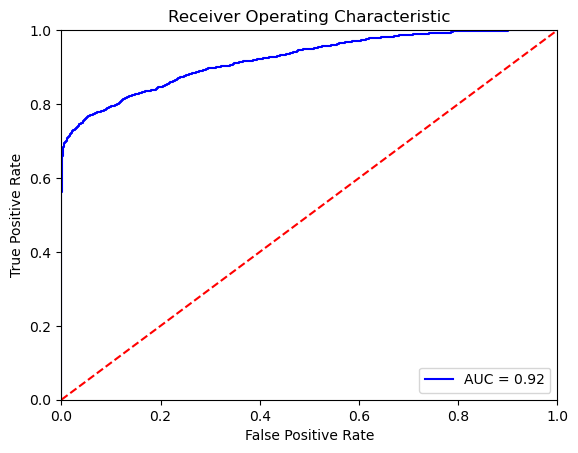

C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


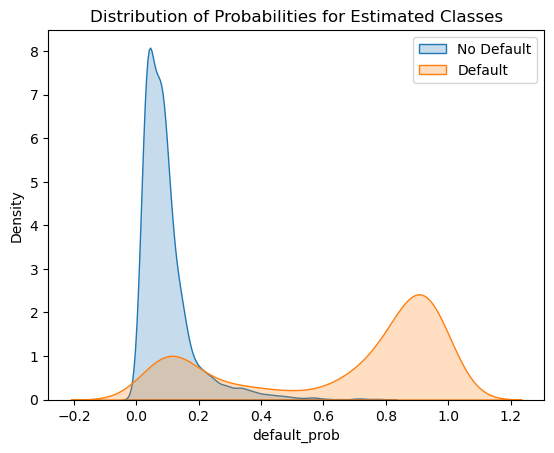

true_class  predicted_class
0           0                  0.992600
            1                  0.007400
1           1                  0.696882
            0                  0.303118
Name: proportion, dtype: float64


In [164]:
eval_model(rfc_model, x_test, y_test)

## Testing Overfitting

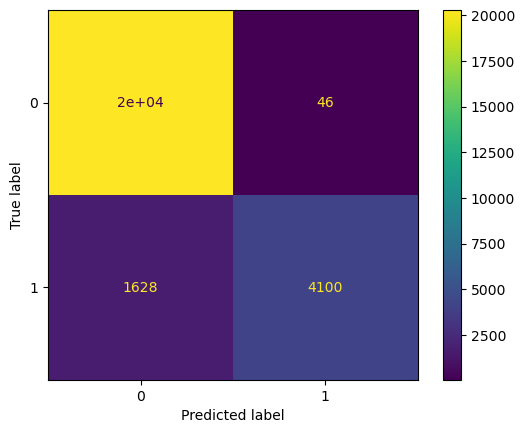



Accuracy:  0.9357438968217411
Precision:  0.9889049686444766
Recall:  0.715782122905028
F1:  0.8304638444399433
AUC:  0.9465426243596751


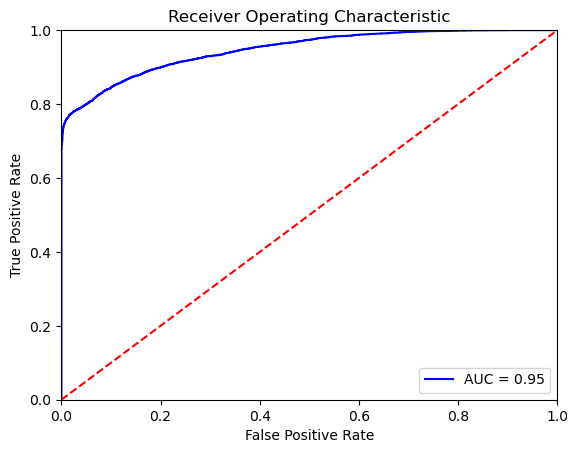

C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


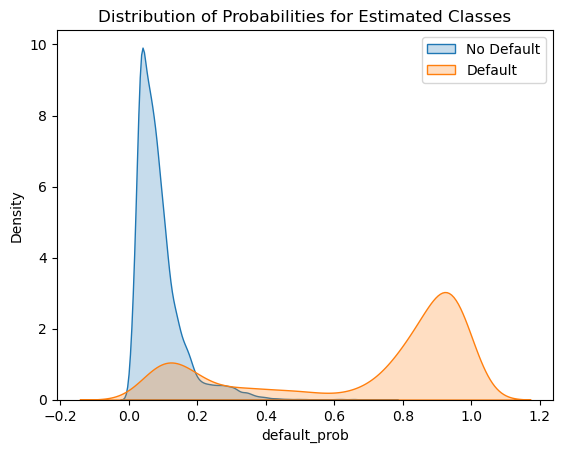

true_class  predicted_class
0           0                  0.997737
            1                  0.002263
1           1                  0.715782
            0                  0.284218
Name: proportion, dtype: float64


In [136]:
eval_model(rfc_model, x_train, y_train)

## Weight Balancing 

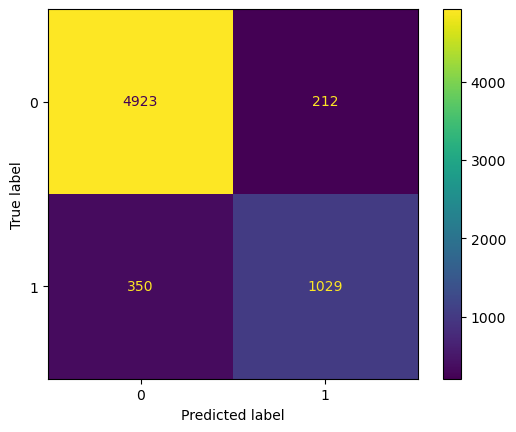



Accuracy:  0.9137242861529015
Precision:  0.8291700241740532
Recall:  0.7461928934010152
F1:  0.7854961832061068
AUC:  0.9254191930282658


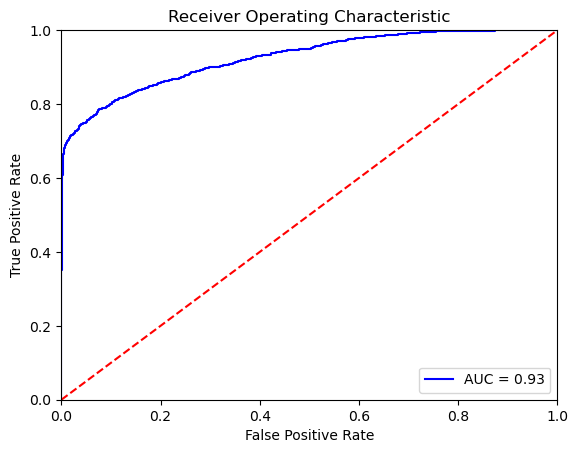

C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


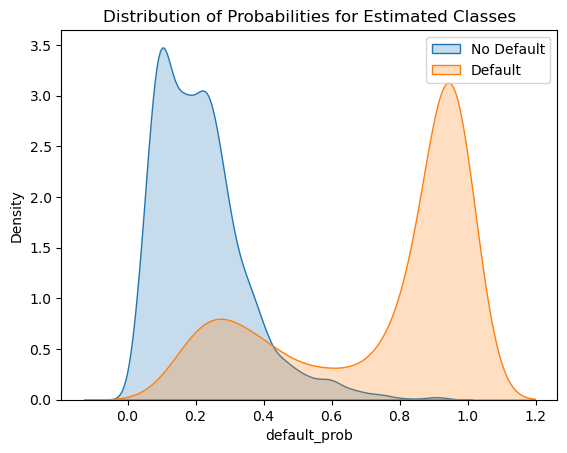

true_class  predicted_class
0           0                  0.958715
            1                  0.041285
1           1                  0.746193
            0                  0.253807
Name: proportion, dtype: float64


In [137]:
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 10, class_weight='balanced')

rfc_model.fit(x_train, y_train)
eval_model(rfc_model, x_test, y_test)

## Class Weights 

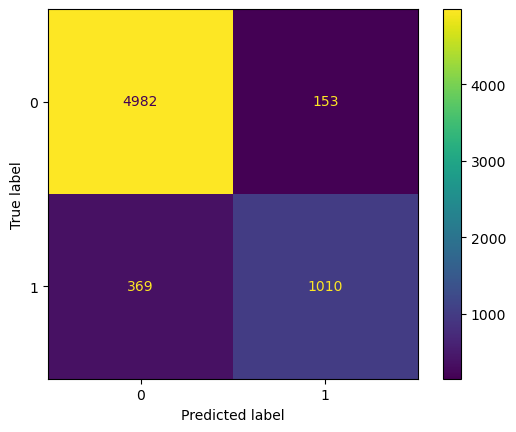



Accuracy:  0.9198649063555419
Precision:  0.8684436801375752
Recall:  0.7324147933284989
F1:  0.7946498819826909
AUC:  0.9240629190253299


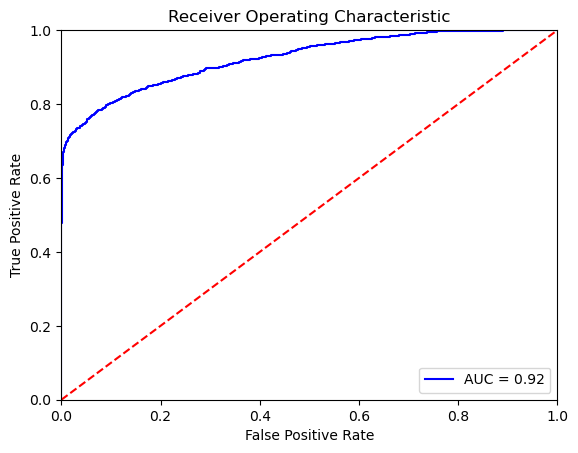

C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


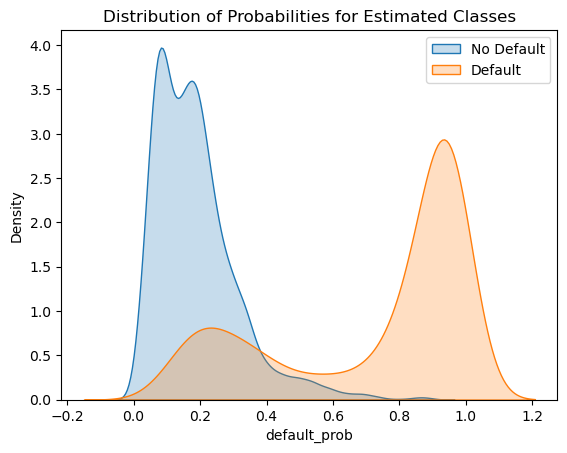

true_class  predicted_class
0           0                  0.970204
            1                  0.029796
1           1                  0.732415
            0                  0.267585
Name: proportion, dtype: float64


In [138]:
weights = {0:0.27, 1:0.73}

rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 10, class_weight=weights)

rfc_model.fit(x_train, y_train)
eval_model(rfc_model, x_test, y_test)

## Resampling

### Upsampling

In [139]:
train_df = x_train.copy()
train_df['loan_status'] = y_train

In [140]:
print(train_df['loan_status'].value_counts())
print(train_df['loan_status'].value_counts(normalize=True))

loan_status
0    20324
1     5728
Name: count, dtype: int64
loan_status
0    0.780132
1    0.219868
Name: proportion, dtype: float64


In [141]:
train_minority = train_df[train_df['loan_status'] == 1]
train_majority = train_df[train_df['loan_status'] == 0]

In [142]:
train_minority_up = resample(train_minority, replace=True,  n_samples=train_majority.shape[0], random_state=123)

In [143]:
print(train_majority['loan_status'].value_counts())
print(train_minority_up['loan_status'].value_counts())

loan_status
0    20324
Name: count, dtype: int64
loan_status
1    20324
Name: count, dtype: int64


In [144]:
train_up_df = pd.concat([train_majority, train_minority_up])

In [145]:
print(train_up_df['loan_status'].value_counts())
print(train_up_df['loan_status'].value_counts(normalize=True))

loan_status
0    20324
1    20324
Name: count, dtype: int64
loan_status
0    0.5
1    0.5
Name: proportion, dtype: float64


In [146]:
x_train_up = train_up_df.drop(['loan_status'], axis=1)
y_train_up = train_up_df['loan_status']

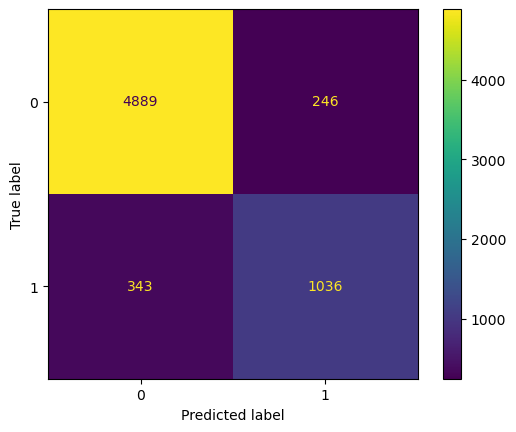



Accuracy:  0.9095793675161191
Precision:  0.8081123244929798
Recall:  0.751269035532995
F1:  0.7786546411123638
AUC:  0.9253954681185934


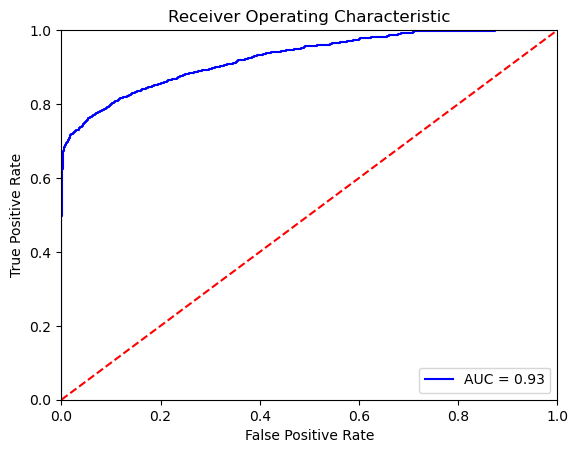

C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


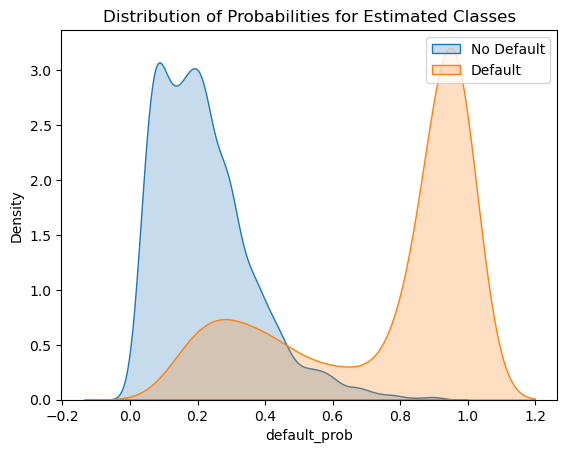

true_class  predicted_class
0           0                  0.952093
            1                  0.047907
1           1                  0.751269
            0                  0.248731
Name: proportion, dtype: float64


In [147]:
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth=10)

rfc_model.fit(x_train_up, y_train_up)
eval_model(rfc_model, x_test, y_test)

### Downsampling

In [148]:
def balance_sample(x_train, y_train, sample_mode='up'):
    train_df = x_train.copy()
    train_df['loan_status'] = y_train

    train_minority = train_df[train_df['loan_status'] == 1]
    train_majority = train_df[train_df['loan_status'] == 0]

    train_sampled_df = pd.DataFrame()

    if sample_mode == 'down':
        train_majority_down = resample(train_majority, replace=False,  n_samples=train_minority.shape[0], random_state=123)
        train_sampled_df = pd.concat([train_minority, train_majority_down])  
    else:
        train_minority_up = resample(train_minority, replace=True,  n_samples=train_majority.shape[0], random_state=123)
        train_sampled_df = pd.concat([train_majority, train_minority_up])

    x_train_samp = train_sampled_df.drop(['loan_status'], axis=1)
    y_train_samp = train_sampled_df['loan_status']

    return x_train_samp, y_train_samp 

In [149]:
x_train_dwn, y_train_dwn = balance_sample(x_train, y_train, sample_mode='down')

print(y_train_dwn.value_counts())
print(y_train_dwn.value_counts(normalize=True))

loan_status
1    5728
0    5728
Name: count, dtype: int64
loan_status
1    0.5
0    0.5
Name: proportion, dtype: float64


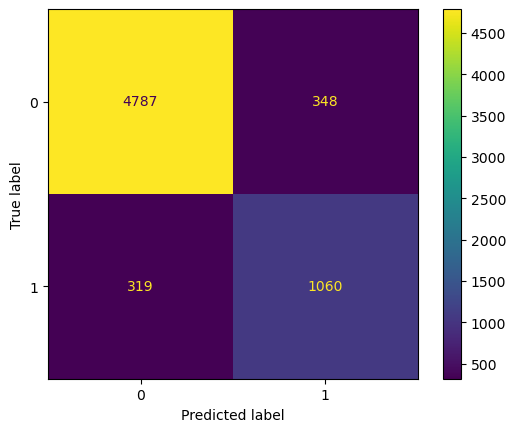



Accuracy:  0.8976051581209702
Precision:  0.7528409090909091
Recall:  0.7686729514140682
F1:  0.7606745604592753
AUC:  0.9222626502842399


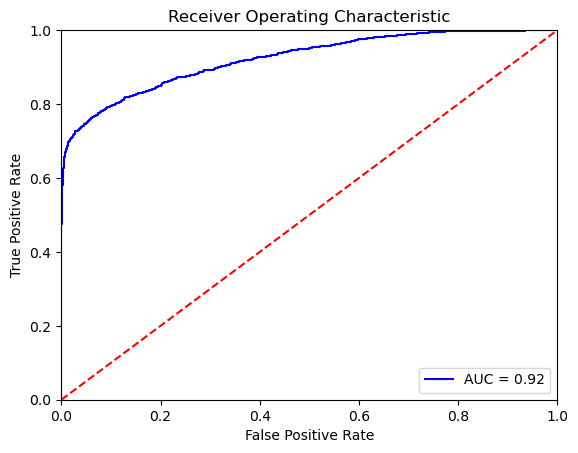

C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


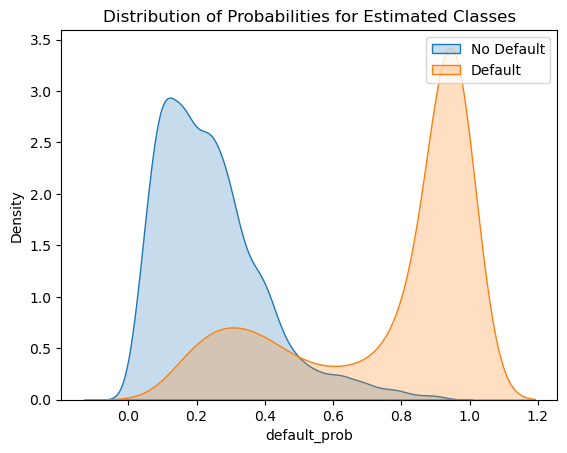

true_class  predicted_class
0           0                  0.932230
            1                  0.067770
1           1                  0.768673
            0                  0.231327
Name: proportion, dtype: float64


In [150]:
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 10)

rfc_model.fit(x_train_dwn, y_train_dwn)
eval_model(rfc_model, x_test, y_test)

### SMOTE

In [151]:
smote = SMOTE()

In [152]:
x_train_synth, y_train_synth = smote.fit_resample(x_train, y_train)

In [153]:
print(y_train_synth.value_counts())
print(y_train_synth.value_counts(normalize=True))

loan_status
1    20324
0    20324
Name: count, dtype: int64
loan_status
1    0.5
0    0.5
Name: proportion, dtype: float64


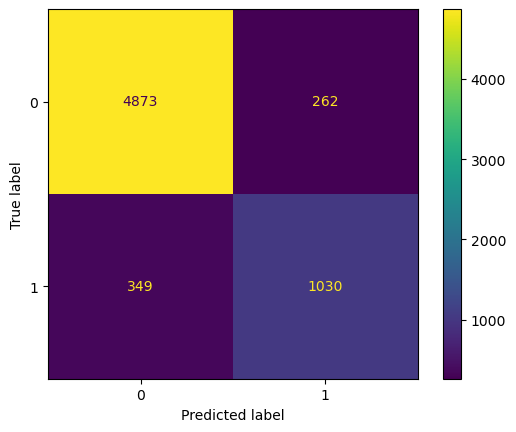



Accuracy:  0.9062020264046668
Precision:  0.7972136222910217
Recall:  0.7469180565627266
F1:  0.7712467240733807
AUC:  0.9244559334516286


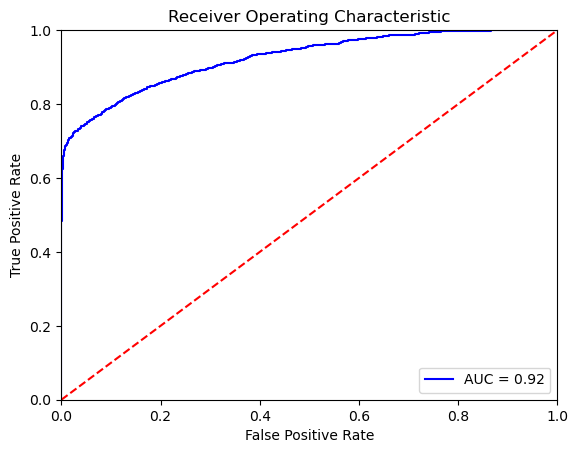

C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


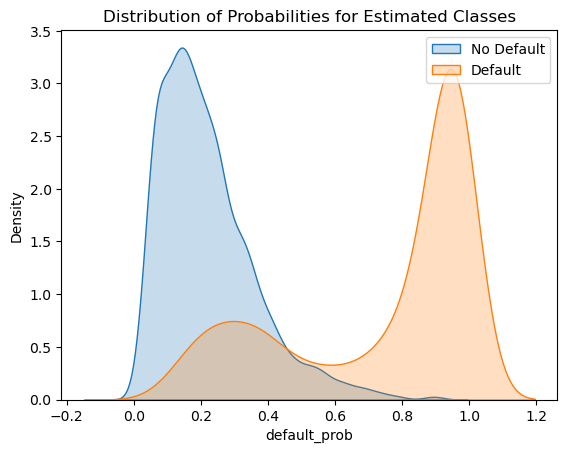

true_class  predicted_class
0           0                  0.948978
            1                  0.051022
1           1                  0.746918
            0                  0.253082
Name: proportion, dtype: float64


In [154]:
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 10)

rfc_model.fit(x_train_synth, y_train_synth)
eval_model(rfc_model, x_test, y_test)